In [4]:
import re
import itertools

import h5py
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


file = r"E:\Documents\课程学习\GraduationProject\program\data\processed_ATL03_20220706032415_02171607_006_02.h5"

assert Path(file).exists(), "File does not exist"

In [5]:

# https://www.cnblogs.com/sw-code/p/18161987
def read_hdf5_atl03_beam_h5py(file_path, beam, verbose=False):
    """
    ATL03 原始数据读取
    Args:
        filename (str): h5文件路径
        beam (str): 光束
        verbose (bool): 输出HDF5信息

    Returns:
        返回ATL03光子数据的heights和geolocation信息
    """

    # 打开HDF5文件进行读取
    file_id = h5py.File(file_path, 'r')

    # 输出HDF5文件信息
    if verbose:
        print(file_id.filename)
        print(list(file_id.keys()))
        print(list(file_id['METADATA'].keys()))

    # 为ICESat-2 ATL03变量和属性分配python字典
    atl03_mds = {}

    # 读取文件中每个输入光束
    beams = [k for k in file_id.keys() if bool(re.match('gt\\d[lr]', k))]
    if beam not in beams:
        print('请填入正确的光束代码')
        return

    atl03_mds['heights'] = {}
    atl03_mds['geolocation'] = {}
    atl03_mds['bckgrd_atlas'] = {}

    # -- 获取每个HDF5变量
    # -- ICESat-2 Measurement Group
    try:
        for key, val in file_id[beam]['heights'].items():
            atl03_mds['heights'][key] = val[:]

        # -- ICESat-2 Geolocation Group
        for key, val in file_id[beam]['geolocation'].items():
            atl03_mds['geolocation'][key] = val[:]

        for key, val in file_id[beam]['bckgrd_atlas'].items():
            atl03_mds['bckgrd_atlas'][key] = val[:]
    except KeyError as e:
        print(f"error in beam:{beam}")
        print(f'KeyError: {e}')
        return None

    return atl03_mds

error in beam:gt1l
KeyError: "Unable to synchronously open object (object 'heights' doesn't exist)"


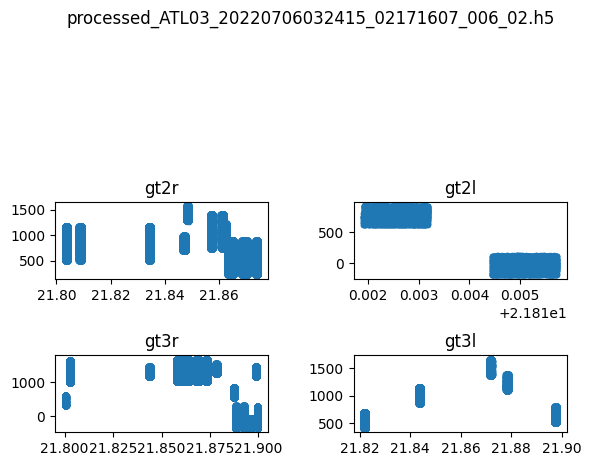

<Figure size 640x480 with 0 Axes>

In [6]:
atl03 = {}

with h5py.File(file, 'r') as f:
    beams = [k for k in f.keys() if bool(re.match('gt\\d[lr]', k))]
    for beam in beams:
        data = read_hdf5_atl03_beam_h5py(file, beam, verbose=False)
        if data is None:
            beams.remove(beam)
            atl03.pop(beam, None) 
            continue
        atl03[beam] = data 

fname = Path(file).name
for x,y in itertools.product([1,2,3],["r","l"]):
    if not f"gt{x}{y}" in atl03.keys(): continue
    plt.subplot(3,2,int(x)*2 + int(y=="l") - 1 )
    plt.plot(atl03[f"gt{x}{y}"]["heights"]["lat_ph"],atl03[f"gt{x}{y}"]["heights"]["h_ph"],'.')
    plt.title(f"gt{x}{y}")
    
    # Adjust single image
    if x==1 and y=="r":
        pass
    elif x==1 and y=="l":
        pass
    elif x==2 and y=="r":
        pass
    elif x==2 and y=="l":
        pass
    elif x==3 and y=="r":
        pass
    elif x==3 and y=="l":
        pass
    
plt.suptitle(fname)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)
plt.show()
plt.savefig(f"{fname}.png")